In [58]:
#!pip install yfinance

In [137]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mp

In [138]:
class Returns:
    def __init__(self, symbol, analysis_start_date=None, analysis_end_date=None ):
        self.symbol = symbol
        self.analysis_start_date = analysis_start_date
        self.analysis_end_date = analysis_end_date
        self.download_data(self)
        self.calculate_returns()

    def download_data(self, symbol, analysis_start_date=None, analysis_end_date=None):
    # to download data
        self.stock_data = yf.download(self.symbol, start = self.analysis_start_date, end = self.analysis_end_date, interval = '1d').reset_index()

        # to calculate returns used log for additive returns 
        self.stock_data["Log_Returns"] = (np.log(self.stock_data['Close'] / self.stock_data['Close'].shift(1))) * 100

        # drop the NaN value
        self.stock_data = self.stock_data.dropna()

        return self.stock_data

    def calculate_returns(self):
        # EXTRACT LAST WROKING DAY
        self.s = pd.date_range(self.analysis_start_date, self.analysis_end_date, freq='BM')
        
        # create column Date(last working date) in df
        self.df = pd.DataFrame(self.s, columns=["Date"])
        
        # compare above dataframe with exsting dataframe
        self.stock_data["Last_Date"] = self.stock_data["Date"].isin(self.df["Date"])
        
        # checking if last date is avilable in data frame
        self.stock_data = self.stock_data[self.stock_data["Last_Date"] == True]
        
        # calculating returns and used np.log to convert retruns to log as it is additive
        self.stock_data["Log_Returns"] = np.log(self.stock_data['Close'] / self.stock_data['Close'].shift(1))
        
        # droping NaN values as start data row will have now return
        self.stock_data.dropna(inplace=True)

        # to create column of cumulative returns
        self.stock_data["Cum Returns"] = np.exp(self.stock_data["Log_Returns"].cumsum())-1
        
        # set date as index
        self.stock_data.set_index("Date", inplace=True)
        
        # calcuate returns in percentage
        self.stock_data["Final Returns"] = self.stock_data["Cum Returns"] * 100
        
        #print(self.stock_data)

        return self.stock_data
    
    def plot_graph(self):
        self.stock_data.plot(y="Final Returns");

[*********************100%***********************]  1 of 1 completed


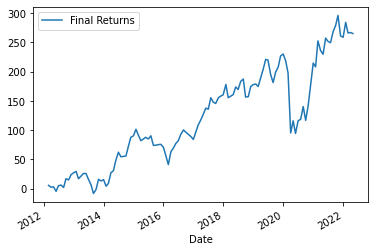

In [139]:
ret = Returns("BANKBEES.NS", "2012-01-01", "2022-05-01")
ret.plot_graph()

In [114]:
# data downloaded for ETF
# data = yf.download("NIFTYBEES.NS")
# data

def download_data(symbol, analysis_start_date=None, analysis_end_date=None):
    # to download data
    data = yf.download(symbol, start = analysis_start_date, end = analysis_end_date, interval = '1d').reset_index()
    
    # to calculate returns used log for additive returns 
    #data["Log_Returns"] = (np.log(data['Close'] / data['Close'].shift(1))) * 100
    
    # drop the NaN value
    #data = data.dropna()
    
    return data

In [115]:
data = yf.download("NIFTYBEES.NS")
data.to_csv("niftybees.csv")

[*********************100%***********************]  1 of 1 completed


In [127]:
def calculate_returns(analysis_start_date, analysis_end_date):
    s = pd.date_range(analysis_start_date, analysis_end_date, freq='BM')
    
    df = pd.DataFrame(s, columns=['Date'])
    stock_data["Last_Date"] = stock_data["Date"].isin(df["Date"])

    stock_data = stock_data[stock_data["Last_Date"] == True]
    stock_data["Log_Returns"] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

    stock_data.dropna(inplace=True)
    
    returns = np.exp(stock_data["Log_Returns"].sum()) * 100
    
    return returns
    

In [117]:
# always checkl ticker symbol from yoahoo website
stock_data = download_data("NIFTYBEES.NS", "2015-01-01", "2022-01-01")
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,83.849998,83.969002,83.000000,83.814003,83.814003,129140
1,2015-01-02,83.699997,84.879997,83.599998,84.713997,84.713997,295810
2,2015-01-05,84.599998,85.224998,84.370003,84.492996,84.492996,546240
3,2015-01-06,84.099998,84.099998,82.055000,82.388000,82.388000,1030240
4,2015-01-07,82.349998,82.360001,81.525002,81.995003,81.995003,1194180


In [86]:
## to convert date to Datatime format if not formatted
#stock_data["Date"] = pd.to_datetime(arg ="float_64" format="%Y-%m-%d")

## to compare close and adjsted close price
#(data.loc[data["Close"]!=data["Adj Close"]])


In [118]:
s = pd.date_range('2015-01-01', '2022-08-31', freq='BM')
df = pd.DataFrame(s, columns=['Date'])
stock_data["Last_Date"] = stock_data["Date"].isin(df["Date"])

stock_data = stock_data[stock_data["Last_Date"] == True]
stock_data["Log_Returns"] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

stock_data.dropna(inplace=True)

stock_data["Cum Returns"] = np.exp(stock_data["Log_Returns"].cumsum())-1
stock_data.set_index("Date", inplace=True)
#stock_data

stock_data["Final Returns"] = stock_data["Cum Returns"] * 100

In [128]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Last_Date,Log_Returns,Cum Returns,Final Returns
Date,,,,,,,,,,
2015-02-27,87.823997,89.000000,87.599998,88.894997,88.894997,1450470,True,-0.006582,-0.006560,-0.656004
2015-03-31,85.199997,85.599998,84.699997,85.078003,85.078003,403210,True,-0.043887,-0.049217,-4.921659
2015-04-30,82.402000,82.550003,81.806999,82.275002,82.275002,1605040,True,-0.033501,-0.080541,-8.054134
2015-05-29,83.449997,84.785004,83.400002,84.644997,84.644997,412300,True,0.028399,-0.054056,-5.405563
2015-06-30,83.599998,84.488998,83.485001,84.375000,84.375000,241910,True,-0.003195,-0.057073,-5.707295


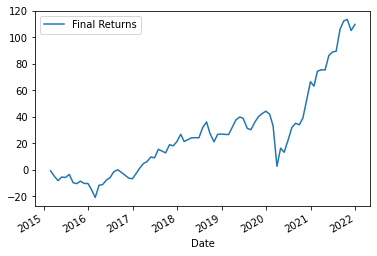

In [120]:
stock_data.plot(y="Final Returns");